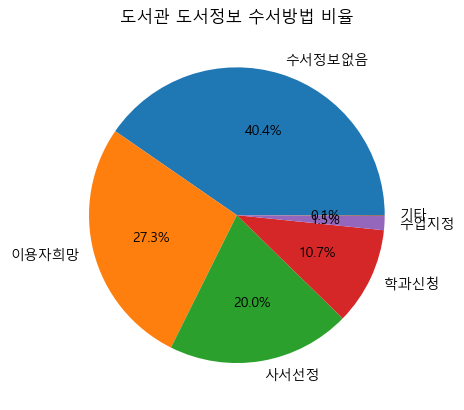

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


book=pd.read_csv("데이터톤2024(도서관정보)\단행본(도서)정보.csv", encoding='cp949')
loan=pd.read_csv("데이터톤2024(도서관정보)\대출정보.csv", encoding='cp949')


book['출판년도'] = book['출판년도'].astype(str)
book['출판년도'] = book['출판년도'].str.extract(r'(\d{4})').astype(float)
book['출판년도'] = book['출판년도'].fillna('미상')
book['저자']=book['저자'].fillna('미상')
book['출판사']=book['출판사'].fillna('미상')
book.isnull().sum()
book_how=book['수서방법'].value_counts()
plt.pie(book_how.values, labels=book_how.index, autopct="%.1f%%")
plt.title('도서관 도서정보 수서방법 비율')
plt.show()


In [2]:

book.isnull().sum()

도서ID    0
등록일자    0
수서방법    0
분류코드    0
ISBN    0
서명      0
저자      0
출판사     0
출판년도    0
소장위치    0
dtype: int64

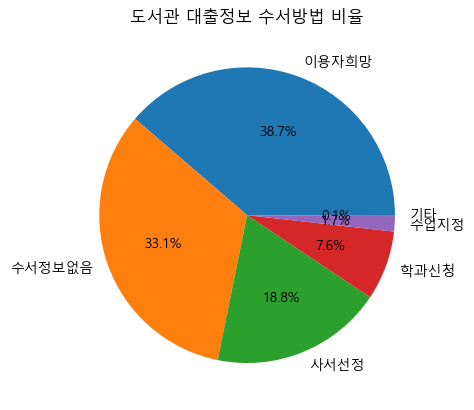

In [3]:
book_np_how=book['수서방법'].to_numpy()
book_np_id=book['도서ID'].to_numpy()
loan_np_id=loan['도서ID'].to_numpy()
loan_book_how=[]
book_id_how={}


for id, how in zip(book_np_id,book_np_how):
    book_id_how[id]=how

for loan_id in loan_np_id:
    loan_book_how.append(book_id_how[loan_id])

loan_book_how_pd=pd.DataFrame({'수서방법':loan_book_how})
loan_how=loan_book_how_pd['수서방법'].value_counts()
plt.pie(loan_how.values, labels=loan_how.index, autopct="%.1f%%")
plt.title('도서관 대출정보 수서방법 비율')
plt.show()

In [4]:
book['분류코드'] = pd.to_numeric(book['분류코드'].str.replace(',', '').str.replace('..', '.', regex=False), errors='coerce')
book = book.dropna(subset=['분류코드'])
book['분류코드'] = book['분류코드'].astype(float)

In [5]:
def classify_subject(code):
    if 0 <= code < 100:
        return "총류"
    elif 100 <= code < 200:
        return "철학"
    elif 200 <= code < 300:
        return "종교"
    elif 300 <= code < 400:
        return "사회과학"
    elif 400 <= code < 500:
        return "언어"
    elif 500 <= code < 600:
        return "자연과학"
    elif 600 <= code < 700:
        return "기술과학"
    elif 700 <= code < 800:
        return "예술"
    elif 800 <= code < 900:
        return "문학"
    elif 900 <= code:
        return "역사"
    else:
        return "기타"

In [6]:
book['주제'] = book['분류코드'].apply(classify_subject)

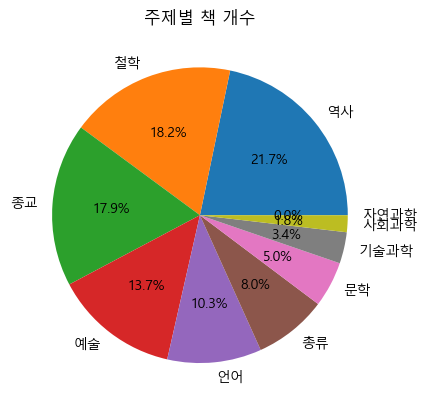

In [7]:
subject_counts = book['주제'].value_counts()

plt.pie(subject_counts.values, labels=subject_counts.index, autopct='%1.1f%%')
plt.title("주제별 책 개수")
plt.show()

     분야    대출건수
0    문학  728577
1    언어   48638
2    역사   71452
3    예술   76087
4    종교   29325
5    철학  204391
6    총류   87504
7  기술과학  108201


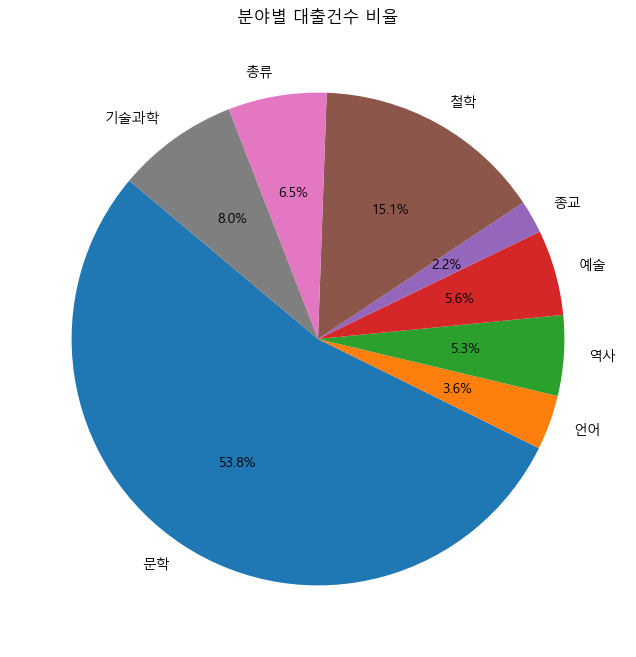

In [67]:
categories = ["문학", "언어", "역사", "예술", "종교", "철학", "총류", "기술과학"]
file_paths = [f"데이터톤2024(도서관정보)\정보나루_인기대출도서_{category}.csv" for category in categories]

# 각 카테고리별 대출건수 합을 저장할 딕셔너리
loan_sums = {}

for category, file_path in zip(categories, file_paths):
    # CSV 파일 불러오기 (필요 시 skiprows와 encoding 옵션 추가)
 
    df = pd.read_csv(file_path, skiprows=13, encoding='euc-kr')

    # 데이터 타입 확인 및 처리
    if '대출건수' in df.columns:  # 대출건수 열이 존재하는지 확인
        df['대출건수'] = pd.to_numeric(
            df['대출건수'].astype(str).str.replace(',', ''), errors='coerce'
        )  # 쉼표 제거 및 숫자로 변환
        df['대출건수'] = df['대출건수'].fillna(0).astype(int)  # NaN 값을 0으로 대체
        loan_sums[category] = df['대출건수'].sum()  # 대출건수 합계 계산
    else:
        loan_sums[category] = 0  # 대출건수 열이 없으면 0으로 설정
loan_df = pd.DataFrame(list(loan_sums.items()), columns=['분야', '대출건수'])

# 표 출력
print(loan_df)

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(loan_sums.values(), labels=loan_sums.keys(), autopct='%1.1f%%', startangle=140)
plt.title('분야별 대출건수 비율')
plt.show()


추후에 필요할지도 몰라서 일단 시각화해둠

In [69]:
import os

unique_subjects = book['주제'].unique()

# 주제별 데이터 저장
for subject in book['주제'].unique():
    subject_df = book[book['주제'] == subject]
    save_path = os.path.join("데이터톤2024(도서관정보)", f"숭실대_{subject}.csv")  # 주제별 파일 저장 경로
    subject_df.to_csv(save_path, index=False, encoding='utf-8-sig')

숭실대 도서관에 있는 책들을 주제별로 분류하여 csv로 저장함

     분야  도서 개수
0    종교  16495
1    철학  15542
2    예술  14324
3    역사  14315
4    언어   8735
5  기술과학   5381
6    총류   3362
7    문학   3150
8  사회과학    825
9  자연과학      5


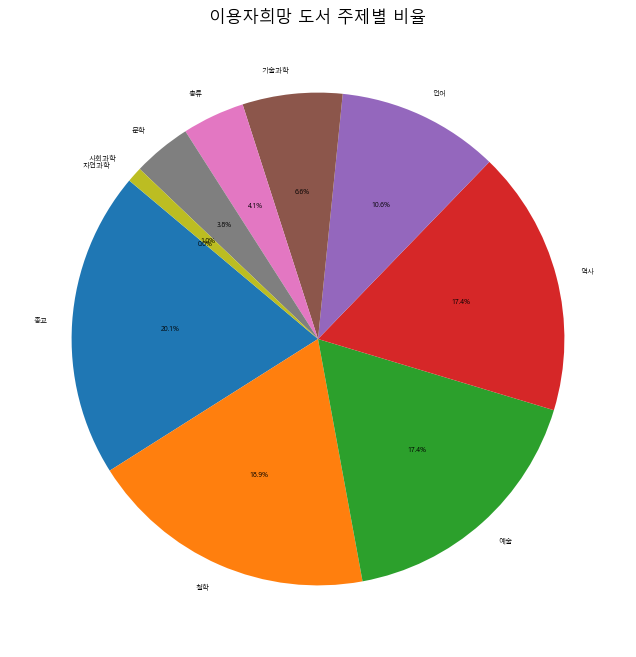

In [68]:
user_requested_books = book[book['수서방법'] == '이용자희망']

subject_counts = user_requested_books['주제'].value_counts()


# 주제별 책 개수를 데이터프레임으로 변환
loan_df = pd.DataFrame(list(subject_counts.items()), columns=['분야', '도서 개수'])

# 표 출력
print(loan_df)

# 원그래프 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    subject_counts.values,
    labels=subject_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors,
    textprops={'fontsize': 5}
)
plt.title('이용자희망 도서 주제별 비율')
plt.show()

수서방법 중 이용자 희망 도서에 해당하는 도서의 주제별 비율을 나타내봄. 전체 보유 도서와 비슷하게 종교, 철학, 예술, 역사가 상위권을 차지했으나, 약간의 비율 차이와 4개간의 순위변동이 존재했음. 또한 다른 도서관들의 분야별 대출 건수와 비교해봤을 때, 종교 책의 숫자가 상당히 많은 편인데, 이는 숭실대가 기독교학교이기 때문에 영향을 받았을 것이라고 추측이 가능함.

문학에서 겹치는 책의 종류: 22
언어에서 겹치는 책의 종류: 361
역사에서 겹치는 책의 종류: 474
예술에서 겹치는 책의 종류: 575
종교에서 겹치는 책의 종류: 585
철학에서 겹치는 책의 종류: 731
총류에서 겹치는 책의 종류: 172
기술과학에서 겹치는 책의 종류: 168
문학에서 겹치는 책의 개수 (중복 포함): 52
언어에서 겹치는 책의 개수 (중복 포함): 614
역사에서 겹치는 책의 개수 (중복 포함): 1055
예술에서 겹치는 책의 개수 (중복 포함): 1086
종교에서 겹치는 책의 개수 (중복 포함): 1145
철학에서 겹치는 책의 개수 (중복 포함): 1597
총류에서 겹치는 책의 개수 (중복 포함): 343
기술과학에서 겹치는 책의 개수 (중복 포함): 255


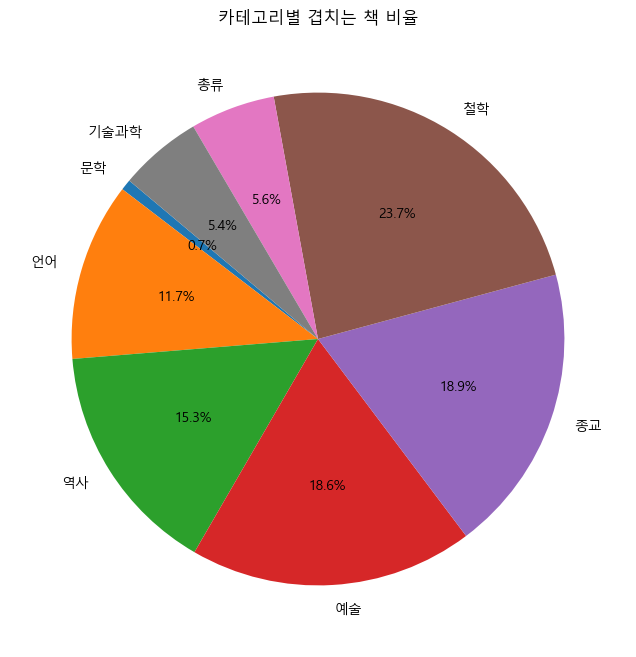

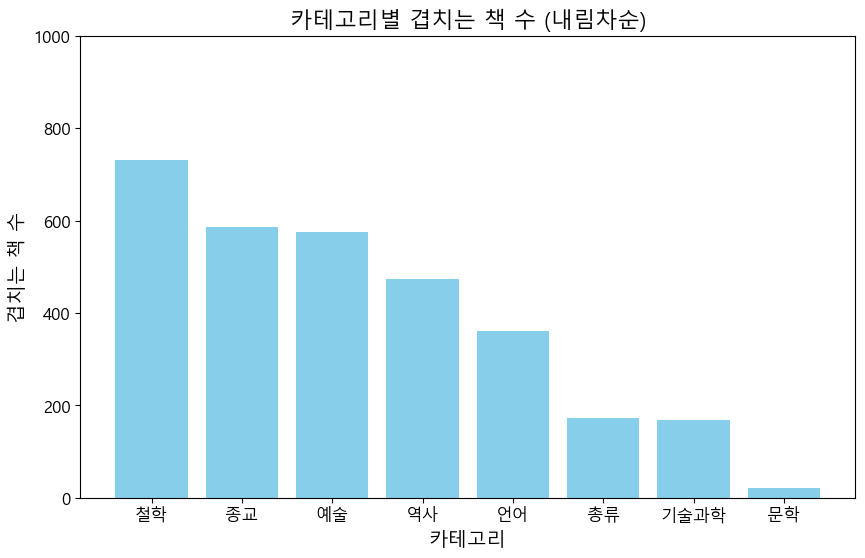

In [70]:

file_paths_ssu = [f"데이터톤2024(도서관정보)\숭실대_{category}.csv" for category in categories]
common_books_counts = {}
common_books_counts_dupli = {}
for category, file_path, file_path_ssu in zip(categories, file_paths, file_paths_ssu):

    df = pd.read_csv(file_path, skiprows=13, encoding='euc-kr')
    df_ssu= pd.read_csv(file_path_ssu, encoding='utf-8-sig')


    df['ISBN'] = df['ISBN'].astype(str)  # 문자열로 변환
    df_ssu['ISBN'] = df_ssu['ISBN'].astype(str)  # 문자열로 변환


    # 두 데이터프레임에서 책 이름(서명)만 추출
    library_books = df['ISBN'].dropna().unique()  # 중복 제거 및 결측값 제거
    library_ssu__books = df_ssu['ISBN'].dropna().unique()


    # 겹치는 책 이름 찾기
    common_books = set(library_books).intersection(set(library_ssu__books))
    common_books_ssu_info = df_ssu[df_ssu['ISBN'].isin(common_books)]

    save_path = os.path.join("데이터톤2024(도서관정보)", f"겹치는_책_리스트_{category}.csv")
    common_books_ssu_info.to_csv(save_path, index=False, encoding='utf-8-sig')

    common_books_counts_dupli[category] = len(common_books)
    print(f"{category}에서 겹치는 책의 종류: {len(common_books)}")

for category in categories:
    common_books_path = f"데이터톤2024(도서관정보)/겹치는_책_리스트_{category}.csv"
    common_books_df = pd.read_csv(common_books_path, encoding='utf-8-sig')

    # 개수 세기
    common_books_counts[category] = len(common_books_df)

    print(f"{category}에서 겹치는 책의 개수 (중복 포함): {common_books_counts[category]}")

plt.figure(figsize=(8, 8))
plt.pie(
    common_books_counts_dupli.values(),
    labels=common_books_counts_dupli.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("카테고리별 겹치는 책 비율")
plt.show()

common_books_df = pd.DataFrame(list(common_books_counts_dupli.items()), columns=['카테고리', '겹치는 책 수'])
common_books_df = common_books_df.sort_values(by='겹치는 책 수', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(common_books_df['카테고리'], common_books_df['겹치는 책 수'], color='skyblue')

# 그래프 설정
plt.title('카테고리별 겹치는 책 수 (내림차순)', fontsize=16)
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('겹치는 책 수', fontsize=14)
plt.ylim(0, 1000)  # 최대치를 1000으로 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 표시
plt.show()





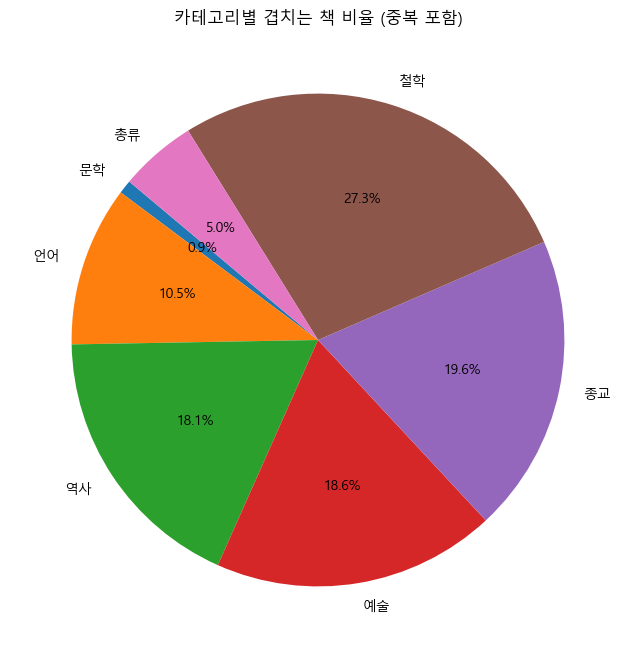

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(
    common_books_counts.values(),
    labels=common_books_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("카테고리별 겹치는 책 비율 (중복 포함)")
plt.show()

문학: 전체 52권 중 34권이 이용자희망 (65.38%)
언어: 전체 614권 중 378권이 이용자희망 (61.56%)
역사: 전체 1055권 중 497권이 이용자희망 (47.11%)
예술: 전체 1086권 중 585권이 이용자희망 (53.87%)
종교: 전체 1145권 중 598권이 이용자희망 (52.23%)
철학: 전체 1597권 중 857권이 이용자희망 (53.66%)
총류: 전체 295권 중 183권이 이용자희망 (62.03%)


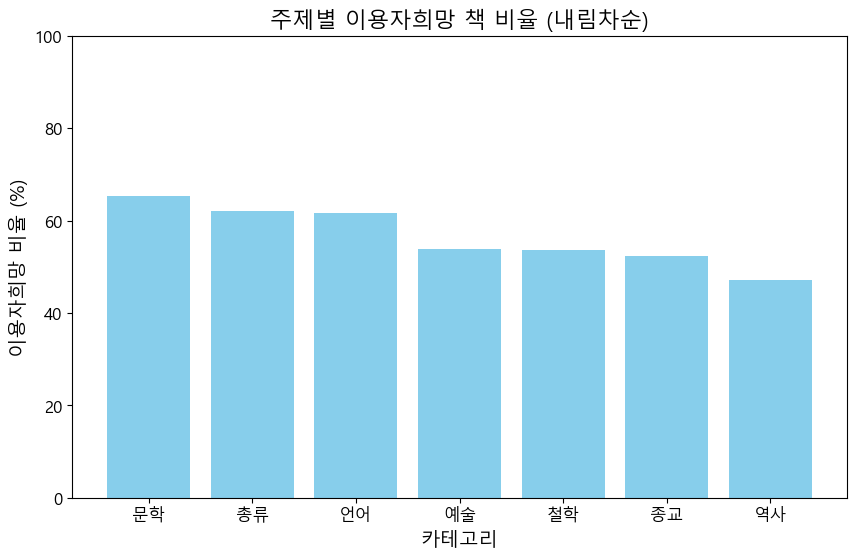

In [57]:
file_paths_dupli = [f"데이터톤2024(도서관정보)/겹치는_책_리스트_{category}.csv" for category in categories]


user_request_ratios = {}

# 데이터 읽기 및 비율 계산
for category, file_path in zip(categories, file_paths_dupli):
    try:
        # 파일 읽기
        df = pd.read_csv(file_path, encoding='utf-8-sig')

        # 전체 책 개수
        total_books = len(df)

        # "수서방법"이 "이용자희망"인 책 개수
        user_requested_books = len(df[df['수서방법'] == '이용자희망'])

        # 비율 계산
        if total_books > 0:
            ratio = (user_requested_books / total_books) * 100
        else:
            ratio = 0  # 책이 없는 경우 비율은 0

        user_request_ratios[category] = ratio
        print(f"{category}: 전체 {total_books}권 중 {user_requested_books}권이 이용자희망 ({ratio:.2f}%)")

    except FileNotFoundError as e:
        print(f"파일을 찾을 수 없습니다: {e}")
    except UnicodeDecodeError as e:
        print(f"인코딩 에러가 발생했습니다: {e}")

# 데이터를 데이터프레임으로 변환 및 내림차순 정렬
user_request_df = pd.DataFrame(list(user_request_ratios.items()), columns=['카테고리', '이용자희망 비율'])
user_request_df = user_request_df.sort_values(by='이용자희망 비율', ascending=False)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(user_request_df['카테고리'], user_request_df['이용자희망 비율'], color='skyblue')

# 그래프 설정
plt.title('주제별 이용자희망 책 비율 (내림차순)', fontsize=16)
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('이용자희망 비율 (%)', fontsize=14)
plt.ylim(0, 100)  # 최대치를 100으로 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 표시
plt.show()

      연도  책 수
24  2024  415
23  2023  774
22  2022  843
21  2021  470
20  2020  517
19  2019  413
18  2018  414
17  2017  444
16  2016  306
15  2015  241
14  2014  172
13  2013  171
12  2012  151
11  2011  197
10  2010  104
9   2009   33
8   2008   37
7   2007   46
6   2006   25
5   2005   14
4   2004   10
3   2003    9
2   2002   14
1   2001    6
0   2000    4


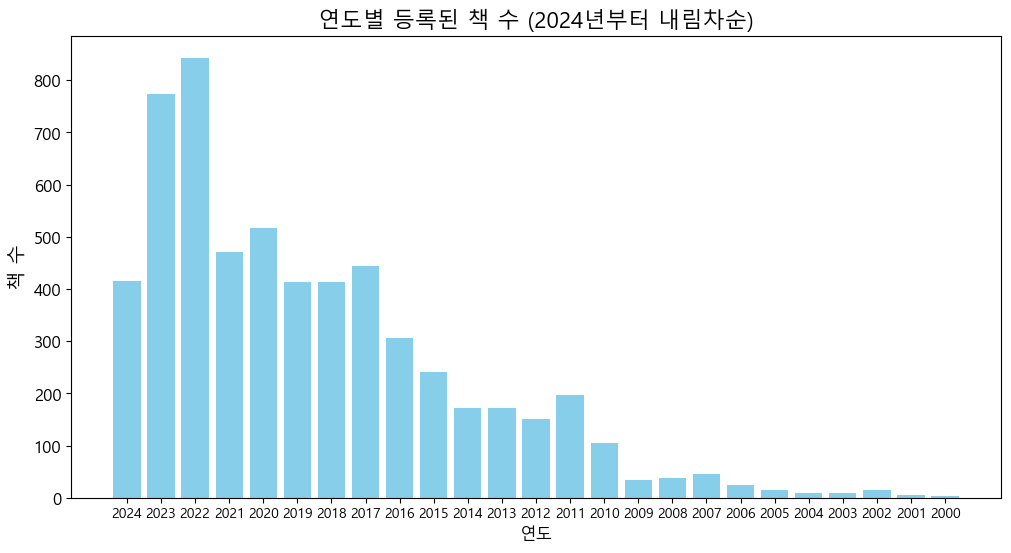

In [63]:
yearly_counts={}
for category, file_path in zip(categories, file_paths_dupli):
    try:
        # 파일 읽기
        df = pd.read_csv(file_path, encoding='utf-8-sig')

        # 등록일자에서 연도 추출
        if '등록일자' in df.columns:
            df['등록연도'] = df['등록일자'].str[:4]  # 연도만 추출
            df['등록연도'] = df['등록연도'].astype(str)  # 데이터가 숫자형인 경우 대비

            # 결측값 제거 및 잘못된 데이터 필터링
            df = df[df['등록연도'].str.isdigit()]  # 숫자가 아닌 값 제거
            df = df[df['등록연도'].astype(int) >= 2000]  # 2000년 이후 데이터만 유지

            # 연도별 책 개수 집계
            year_counts = df['등록연도'].value_counts().sort_index()

            # 딕셔너리에 저장
            yearly_counts[category] = year_counts

    except FileNotFoundError as e:
        print(f"파일을 찾을 수 없습니다: {e}")
    except UnicodeDecodeError as e:
        print(f"인코딩 에러가 발생했습니다: {e}")

# 연도별 총합 집계
all_years = sorted(set().union(*[counts.index for counts in yearly_counts.values()]))
total_counts = {year: 0 for year in all_years}

for counts in yearly_counts.values():
    for year, count in counts.items():
        total_counts[year] += count

# 데이터프레임으로 변환 및 정렬
total_counts_df = pd.DataFrame(list(total_counts.items()), columns=['연도', '책 수'])
total_counts_df['연도'] = total_counts_df['연도'].astype(int)  # 정렬을 위해 int로 변환
total_counts_df = total_counts_df.sort_values(by='연도', ascending=False)  # 내림차순으로 정렬


# 데이터 확인
print(total_counts_df)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(total_counts_df['연도'].astype(str), total_counts_df['책 수'], color='skyblue')

# 그래프 설정
plt.title('연도별 등록된 책 수 (2024년부터 내림차순)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('책 수', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# 그래프 표시
plt.show()